# Test Bench

Test bench is a class we created that takes in some perediction model and creates multiple instances of that model. Each instance is trained and tested on different data, it is used to easily access the quality of each model on multiple datasets.

## How Is It Used?

First define a class that has these functions:
1. `learn_from_data_set`
2. `predict`

In [1]:
import numpy as np
import src.test_bench as bench

In [2]:
class DumbPredictor:
    def __init__(self):
        print("Constructor called.")
        self.print_once = True

    def learn_from_data_set(self, training_data_set):
        print("Training started.")
        print("What does a dataframe to learn on look like?")
        display(training_data_set[0])
        print("Training ending.")

    def predict(self, ts_as_df_start, how_much_to_predict):
        if self.print_once:
            self.print_once = False
            print("What does a dataframe to predict look like?")
            display(ts_as_df_start)
        ts_as_np = ts_as_df_start["sample"].to_numpy()
        res = np.resize(ts_as_np, how_much_to_predict)
        # these checks will also be done by the testbench
        assert isinstance(res, np.ndarray)
        assert len(res) == how_much_to_predict
        assert res.shape == (how_much_to_predict,)
        assert res.dtype == np.float64
        return res

After the model has been defined (including how you choose to you use each sample for learning, what optimization algorithms and so on) you can send the model to the test_bench to be used for prediction on multiple models.
Notice that the class you denfine need to have these methods with the same argument names.

Let's now run the test bench on this class.

[TEST BENCH] Powering on test bench
[TEST BENCH] testing metric='node_mem', app='moc/smaug'.
[TEST BENCH] Fetching data for metric='node_mem', app='moc/smaug'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train data is 768
[TEST BENCH] Amount of test data is 191
[TEST BENCH] Making an instance of the class we want to test
Constructor called.
[TEST BENCH] Starting training loop
Training started.
What does a dataframe to learn on look like?


,sample,time
0,2.352709,2022-06-07 19:05:00
1,2.273503,2022-06-07 19:10:00
2,2.327211,2022-06-07 19:15:00
3,2.380199,2022-06-07 19:20:00
4,2.434321,2022-06-07 19:25:00
...,...,...
91,2.760429,2022-06-08 02:40:00
92,2.802700,2022-06-08 02:45:00
93,2.712074,2022-06-08 02:50:00
94,2.744775,2022-06-08 02:55:00


Training ending.
[TEST BENCH] Training took 0.0123443603515625 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,1.960222,2022-06-03 05:05:00
1,1.980224,2022-06-03 05:10:00
2,1.986888,2022-06-03 05:15:00
3,1.977888,2022-06-03 05:20:00
4,1.983583,2022-06-03 05:25:00
5,1.973753,2022-06-03 05:30:00
6,1.965649,2022-06-03 05:35:00
7,1.962660,2022-06-03 05:40:00
8,1.957473,2022-06-03 05:45:00
9,1.957698,2022-06-03 05:50:00


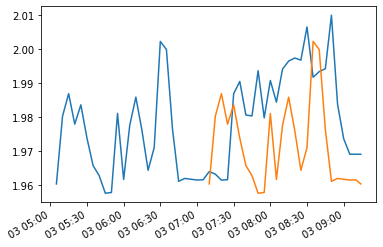

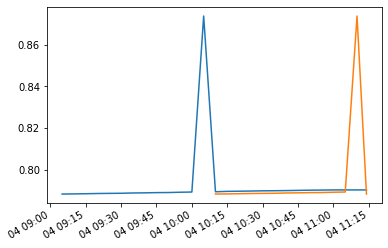

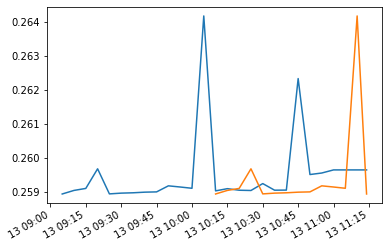

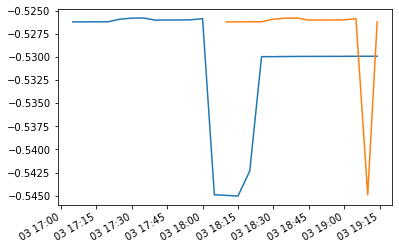

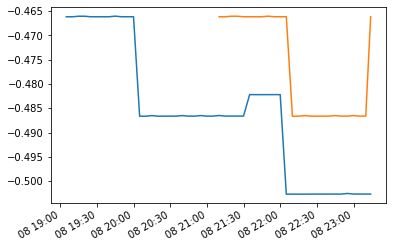

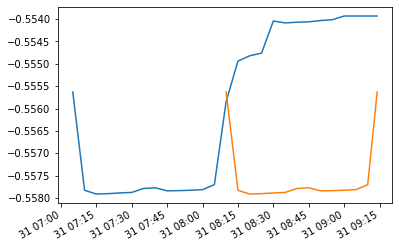

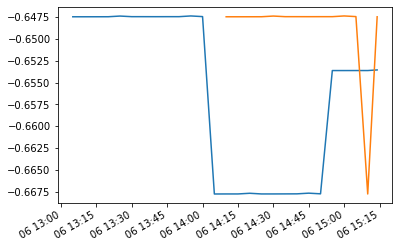

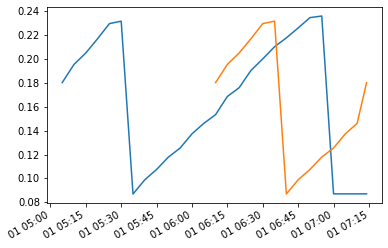

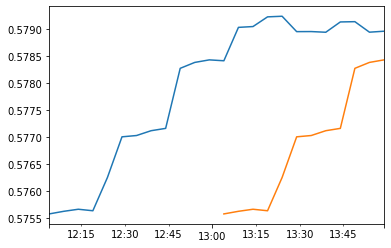

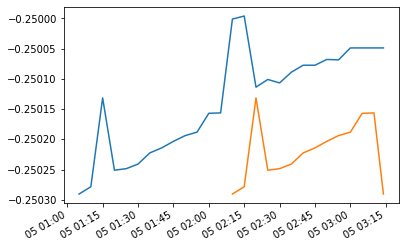

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='moc/smaug':
[TEST BENCH] Average mse over the test set is        0.004622262485128901
[TEST BENCH] Average precision over the test set is  0.7141261058663709
[TEST BENCH] Average recall over the test set is     0.6715408745482565
[TEST BENCH] Average F1 over the test set is         0.6873464927377341
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='moc/smaug'
[TEST BENCH] testing metric='node_mem', app='emea/balrog'.
[TEST BENCH] Fetching data for metric='node_mem', app='emea/balrog'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train data is 20

,sample,time
0,-0.653382,2022-06-10 12:04:00
1,-0.653383,2022-06-10 12:09:00
2,-0.653383,2022-06-10 12:14:00
3,-0.653382,2022-06-10 12:19:00
4,-0.653385,2022-06-10 12:24:00
5,-0.652883,2022-06-10 12:29:00
6,-0.652885,2022-06-10 12:34:00
7,-0.652885,2022-06-10 12:39:00
8,-0.652885,2022-06-10 12:44:00
9,-0.653043,2022-06-10 12:49:00


Training ending.
[TEST BENCH] Training took 0.0 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.442152,2022-06-04 21:05:00
1,-0.442152,2022-06-04 21:10:00
2,-0.442152,2022-06-04 21:15:00
3,-0.442152,2022-06-04 21:20:00
4,-0.442152,2022-06-04 21:25:00
5,-0.442151,2022-06-04 21:30:00
6,-0.442112,2022-06-04 21:35:00
7,-0.442114,2022-06-04 21:40:00
8,-0.442112,2022-06-04 21:45:00
9,-0.442112,2022-06-04 21:50:00


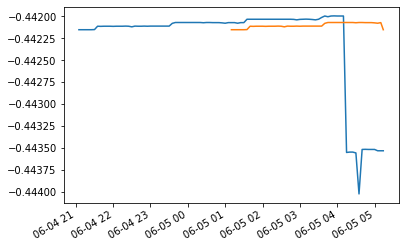

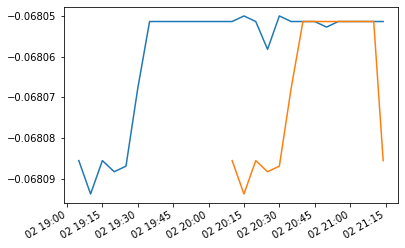

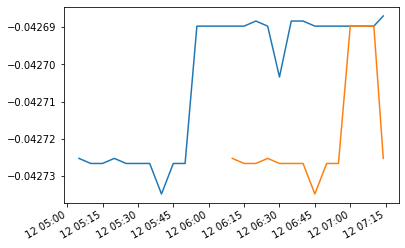

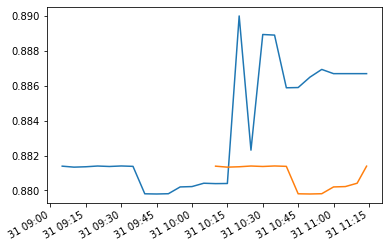

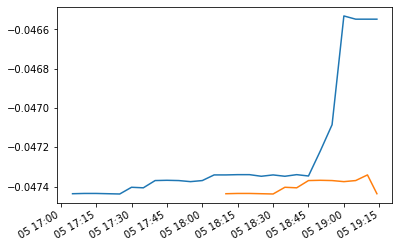

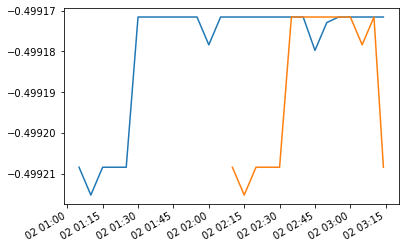

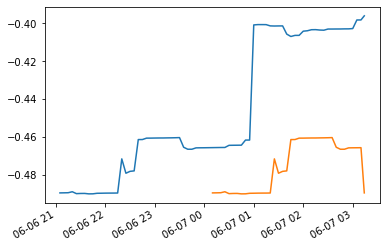

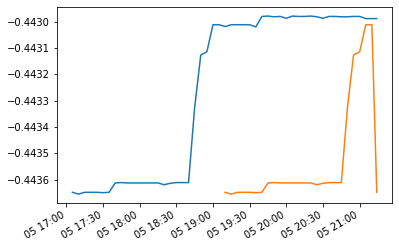

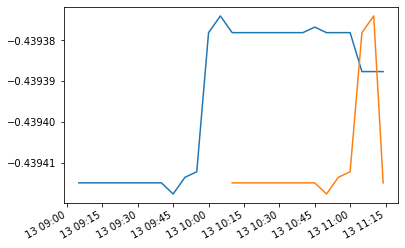

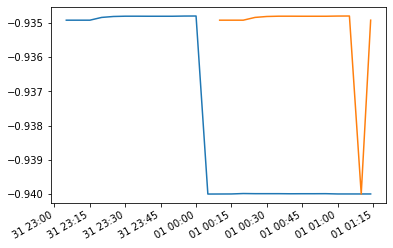

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='emea/balrog':
[TEST BENCH] Average mse over the test set is        0.0009608466405684617
[TEST BENCH] Average precision over the test set is  0.7795228591163926
[TEST BENCH] Average recall over the test set is     0.690840684273557
[TEST BENCH] Average F1 over the test set is         0.7225997456746456
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='emea/balrog'
[TEST BENCH] testing metric='container_mem', app='kube-rbac-proxy'.
[TEST BENCH] Fetching data for metric='container_mem', app='kube-rbac-proxy'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amou

,sample,time
0,0.751283,2022-06-08 19:05:00
1,0.787296,2022-06-08 19:10:00
2,0.665068,2022-06-08 19:15:00
3,0.665068,2022-06-08 19:20:00
4,0.658520,2022-06-08 19:25:00
...,...,...
166,0.704356,2022-06-09 08:55:00
167,0.695625,2022-06-09 09:00:00
168,0.590858,2022-06-09 09:05:00
169,0.590858,2022-06-09 09:10:00


Training ending.
[TEST BENCH] Training took 0.01594400405883789 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,0.796027,2022-05-27 22:37:00
1,0.793844,2022-05-27 22:42:00
2,0.820036,2022-05-27 22:47:00
3,0.767652,2022-05-27 22:52:00
4,0.801483,2022-05-27 22:57:00
...,...,...
82,0.763287,2022-05-28 05:27:00
83,0.765470,2022-05-28 05:32:00
84,0.778566,2022-05-28 05:37:00
85,0.824401,2022-05-28 05:42:00


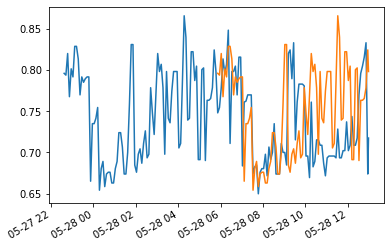

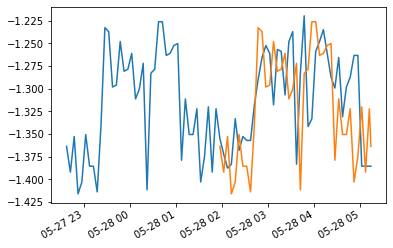

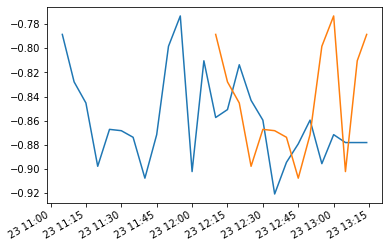

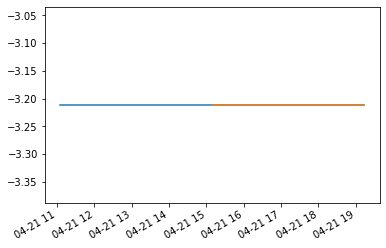

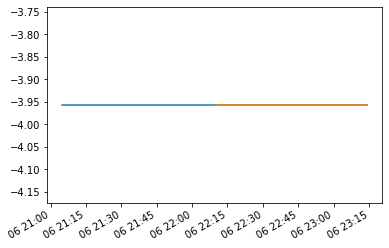

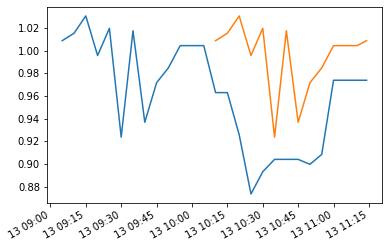

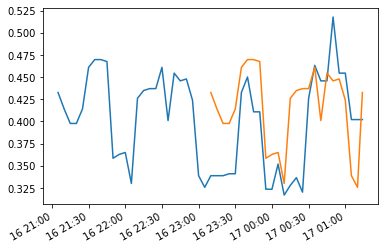

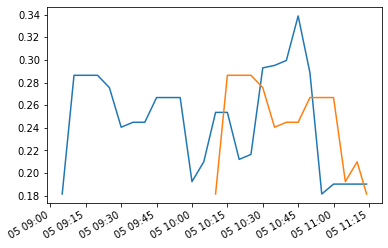

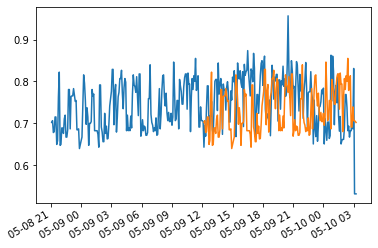

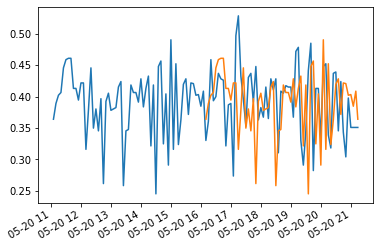

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='kube-rbac-proxy':
[TEST BENCH] Average mse over the test set is        0.010682843575515102
[TEST BENCH] Average precision over the test set is  0.638199648467987
[TEST BENCH] Average recall over the test set is     0.6184538492441338
[TEST BENCH] Average F1 over the test set is         0.6251993845621415
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='kube-rbac-proxy'
[TEST BENCH] testing metric='container_mem', app='cni-plugins'.
[TEST BENCH] Fetching data for metric='container_mem', app='cni-plugins'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BE

,sample,time
0,-0.605167,2022-05-04 03:05:00
1,-0.605167,2022-05-04 03:10:00
2,-0.605167,2022-05-04 03:15:00
3,-0.605167,2022-05-04 03:20:00
4,-0.605167,2022-05-04 03:25:00
...,...,...
70,-0.605167,2022-05-04 08:55:00
71,-0.605167,2022-05-04 09:00:00
72,-0.605167,2022-05-04 09:05:00
73,-0.605167,2022-05-04 09:10:00


Training ending.
[TEST BENCH] Training took 0.015636444091796875 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.605167,2022-05-05 05:05:00
1,-0.605167,2022-05-05 05:10:00
2,-0.605167,2022-05-05 05:15:00
3,-0.605167,2022-05-05 05:20:00
4,-0.605167,2022-05-05 05:25:00
...,...,...
116,-0.605167,2022-05-05 14:45:00
117,-0.605167,2022-05-05 14:50:00
118,-0.605167,2022-05-05 14:55:00
119,-0.605167,2022-05-05 15:00:00


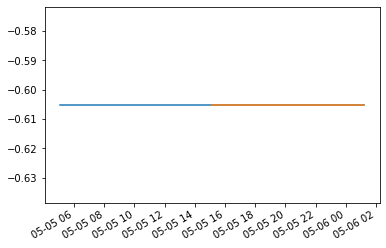

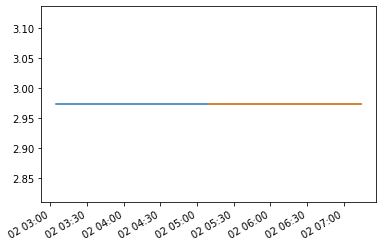

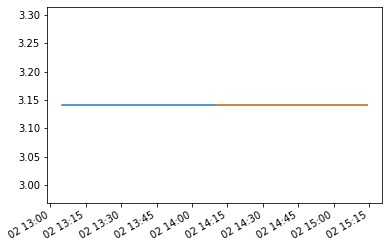

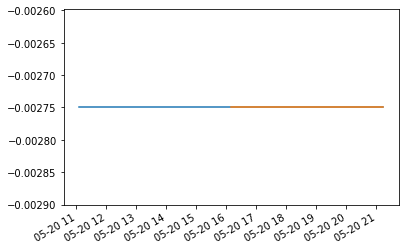

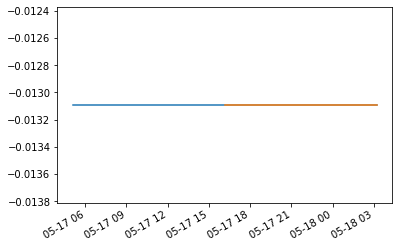

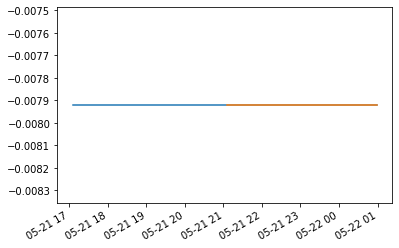

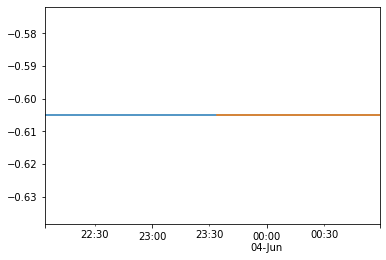

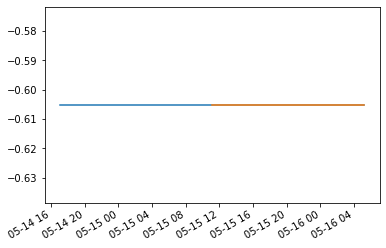

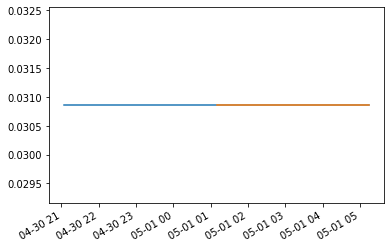

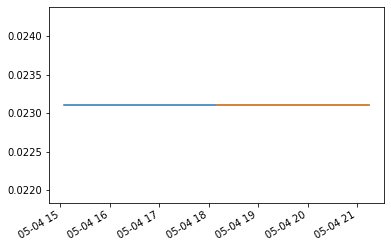

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='cni-plugins':
[TEST BENCH] Average mse over the test set is        1.5424378707811494e-06
[TEST BENCH] Average precision over the test set is  0.9999920755673894
[TEST BENCH] Average recall over the test set is     0.9997677165930304
[TEST BENCH] Average F1 over the test set is         0.9998718515884698
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='cni-plugins'
[TEST BENCH] testing metric='container_mem', app='driver-registrar'.
[TEST BENCH] Fetching data for metric='container_mem', app='driver-registrar'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TE

,sample,time
0,-1.213886,2022-05-13 08:02:00
1,-1.213886,2022-05-13 08:07:00
2,-1.213886,2022-05-13 08:12:00
3,-1.213886,2022-05-13 08:17:00
4,-1.213886,2022-05-13 08:22:00
...,...,...
56,-1.213886,2022-05-13 12:42:00
57,-1.213886,2022-05-13 12:47:00
58,-1.213886,2022-05-13 12:52:00
59,-1.213886,2022-05-13 12:57:00


Training ending.
[TEST BENCH] Training took 0.0 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-1.213886,2022-04-25 13:05:00
1,-1.213886,2022-04-25 13:10:00
2,-1.213886,2022-04-25 13:15:00
3,-1.213886,2022-04-25 13:20:00
4,-1.213886,2022-04-25 13:25:00
5,-1.213886,2022-04-25 13:30:00
6,-1.213886,2022-04-25 13:35:00
7,-1.213886,2022-04-25 13:40:00
8,-1.213886,2022-04-25 13:45:00
9,-1.213886,2022-04-25 13:50:00


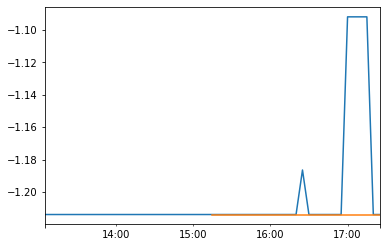

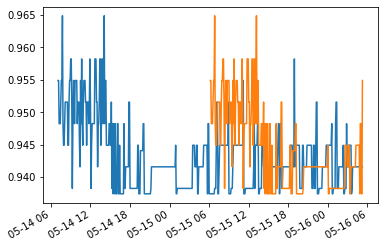

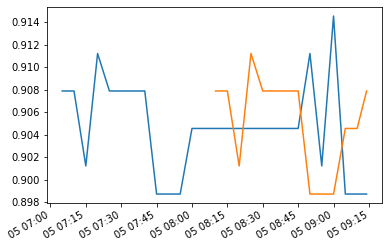

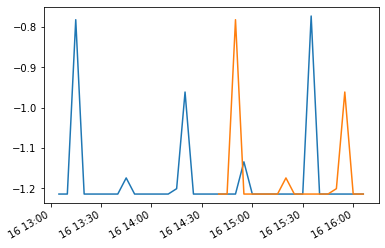

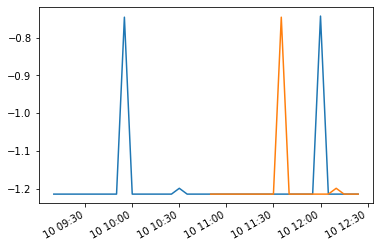

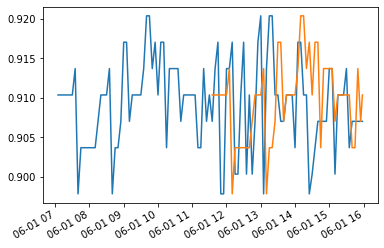

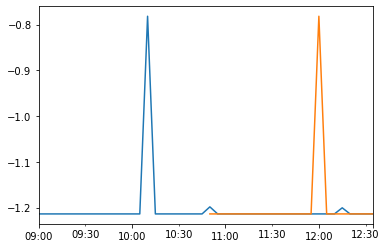

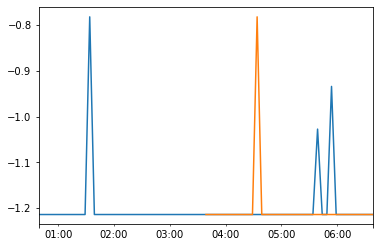

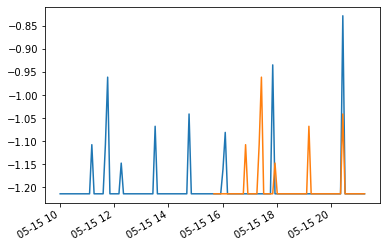

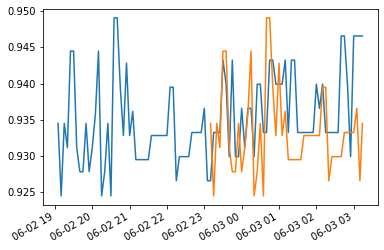

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='driver-registrar':
[TEST BENCH] Average mse over the test set is        0.006688328428219392
[TEST BENCH] Average precision over the test set is  0.8790675690176115
[TEST BENCH] Average recall over the test set is     0.8703295513778816
[TEST BENCH] Average F1 over the test set is         0.8729794684346365
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='driver-registrar'
[TEST BENCH] testing metric='container_cpu', app='kube-rbac-proxy'.
[TEST BENCH] Fetching data for metric='container_cpu', app='kube-rbac-proxy'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and te

,sample,time
0,2.446106,2022-05-14 07:05:00
1,2.702959,2022-05-14 07:10:00
2,2.942813,2022-05-14 07:15:00
3,3.015610,2022-05-14 07:20:00
4,2.666483,2022-05-14 07:25:00
...,...,...
92,3.374979,2022-05-14 14:45:00
93,3.522206,2022-05-14 14:50:00
94,3.625880,2022-05-14 14:55:00
95,3.285674,2022-05-14 15:00:00


Training ending.
[TEST BENCH] Training took 0.015628814697265625 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.480786,2022-06-07 05:05:00
1,-0.808446,2022-06-07 05:10:00
2,-0.416683,2022-06-07 05:15:00
3,-0.398463,2022-06-07 05:20:00
4,-0.530840,2022-06-07 05:25:00
5,-0.551247,2022-06-07 05:30:00
6,-0.690171,2022-06-07 05:35:00
7,-0.458040,2022-06-07 05:40:00
8,-0.643231,2022-06-07 05:45:00
9,-0.683398,2022-06-07 05:50:00


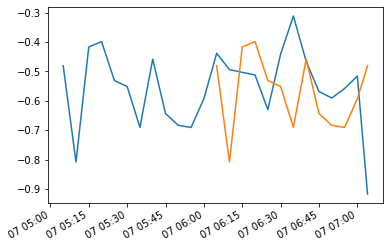

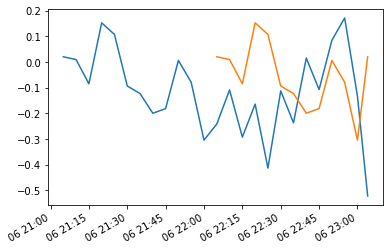

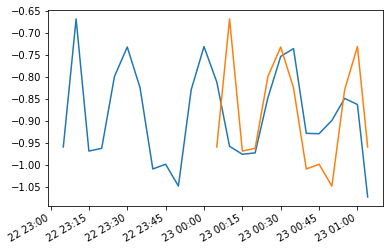

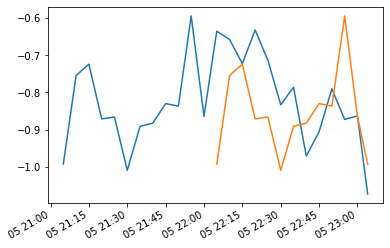

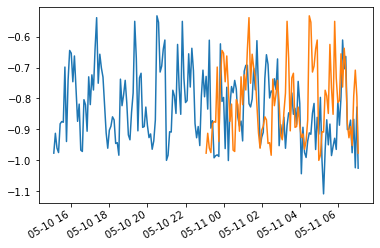

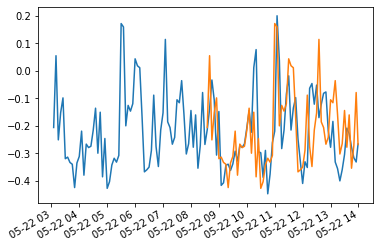

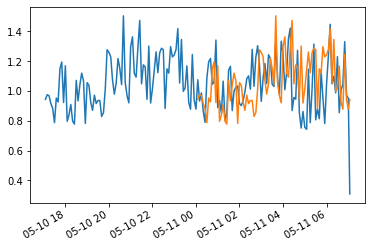

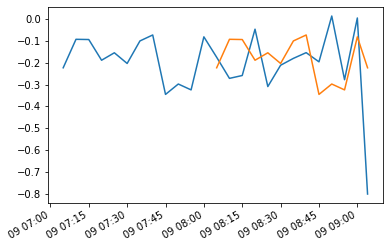

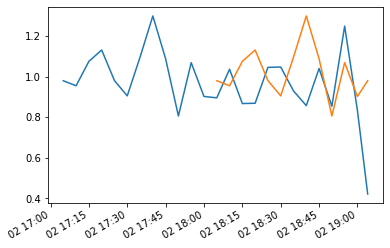

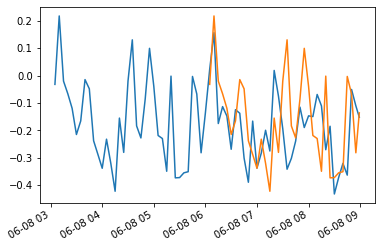

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_cpu', app='kube-rbac-proxy':
[TEST BENCH] Average mse over the test set is        0.1178216867875983
[TEST BENCH] Average precision over the test set is  0.49447931241975024
[TEST BENCH] Average recall over the test set is     0.5117482831409632
[TEST BENCH] Average F1 over the test set is         0.4986562761307672
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_cpu', app='kube-rbac-proxy'
[TEST BENCH] testing metric='container_cpu', app='oauth-proxy'.
[TEST BENCH] Fetching data for metric='container_cpu', app='oauth-proxy'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BE

,sample,time
0,-0.211472,2022-05-04 15:05:00
1,-0.208518,2022-05-04 15:10:00
2,-0.208971,2022-05-04 15:15:00
3,-0.207147,2022-05-04 15:20:00
4,-0.208379,2022-05-04 15:25:00
...,...,...
67,-0.213610,2022-05-04 20:40:00
68,-0.206983,2022-05-04 20:45:00
69,-0.214127,2022-05-04 20:50:00
70,-0.202595,2022-05-04 20:55:00


Training ending.
[TEST BENCH] Training took 0.007002115249633789 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.242028,2022-05-12 19:05:00
1,-0.237417,2022-05-12 19:10:00
2,-0.237322,2022-05-12 19:15:00
3,-0.240092,2022-05-12 19:20:00
4,-0.238866,2022-05-12 19:25:00
5,-0.238584,2022-05-12 19:30:00
6,-0.239073,2022-05-12 19:35:00
7,-0.239485,2022-05-12 19:40:00
8,-0.241824,2022-05-12 19:45:00
9,-0.239552,2022-05-12 19:50:00


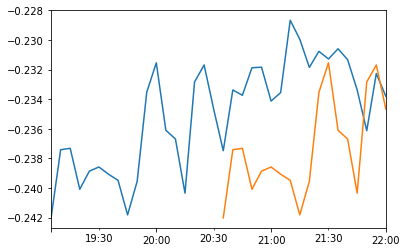

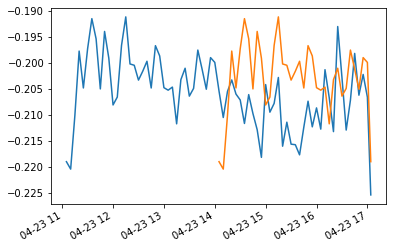

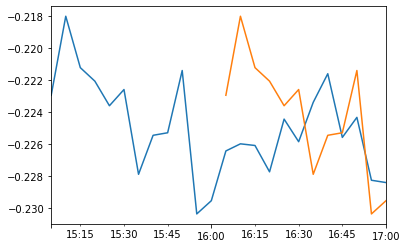

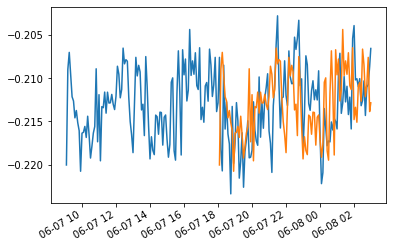

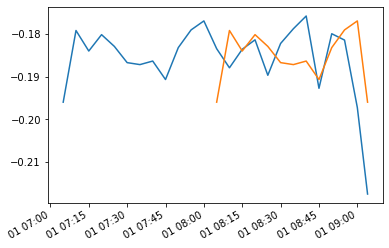

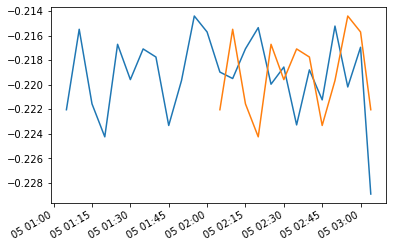

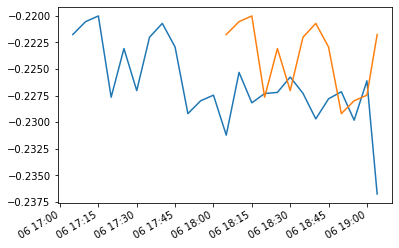

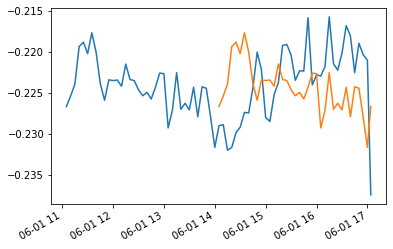

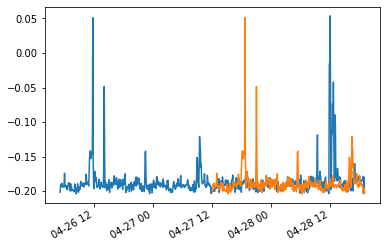

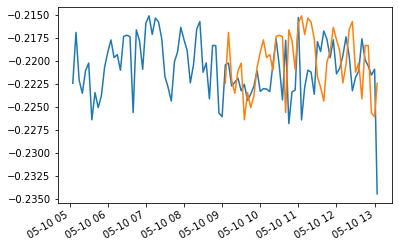

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_cpu', app='oauth-proxy':
[TEST BENCH] Average mse over the test set is        0.003754762421025647
[TEST BENCH] Average precision over the test set is  0.4902994495735638
[TEST BENCH] Average recall over the test set is     0.5088765609113822
[TEST BENCH] Average F1 over the test set is         0.49488252941613087
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_cpu', app='oauth-proxy'
[TEST BENCH] testing metric='container_cpu', app='collector'.
[TEST BENCH] Fetching data for metric='container_cpu', app='collector'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amoun

,sample,time
0,0.230715,2022-06-02 09:05:00
1,0.208896,2022-06-02 09:10:00
2,0.156123,2022-06-02 09:15:00
3,0.215906,2022-06-02 09:20:00
4,0.304836,2022-06-02 09:25:00
5,0.224904,2022-06-02 09:30:00
6,0.221435,2022-06-02 09:35:00
7,0.298054,2022-06-02 09:40:00
8,0.213992,2022-06-02 09:45:00
9,0.221748,2022-06-02 09:50:00


Training ending.
[TEST BENCH] Training took 0.0 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,0.211332,2022-05-14 15:05:00
1,0.397197,2022-05-14 15:10:00
2,0.471317,2022-05-14 15:15:00
3,0.339821,2022-05-14 15:20:00
4,0.389147,2022-05-14 15:25:00
...,...,...
235,0.159663,2022-05-15 10:40:00
236,0.224559,2022-05-15 10:45:00
237,0.233743,2022-05-15 10:50:00
238,0.242975,2022-05-15 10:55:00


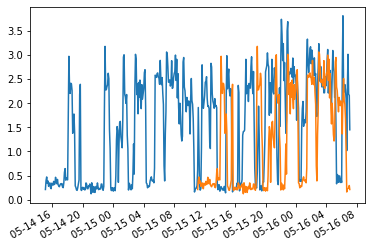

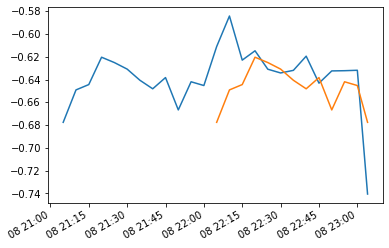

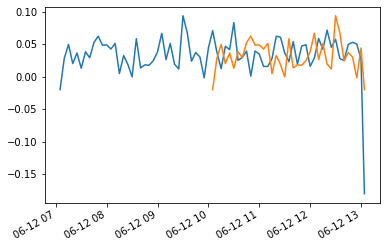

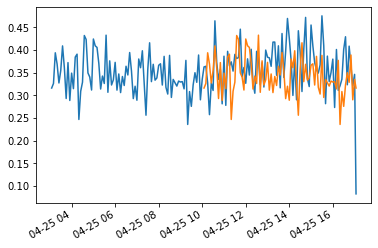

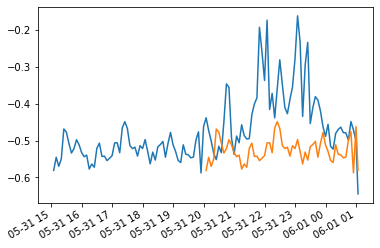

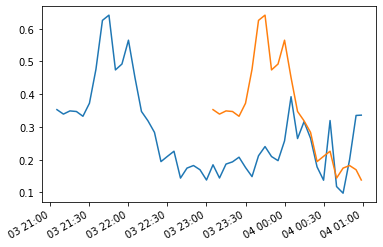

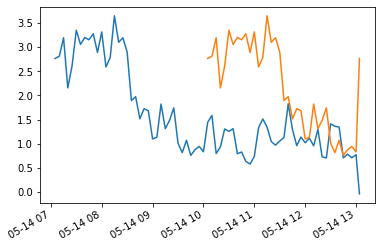

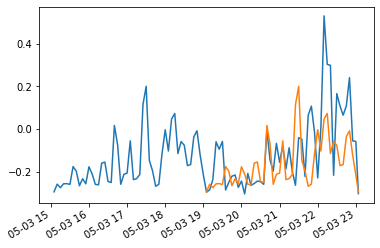

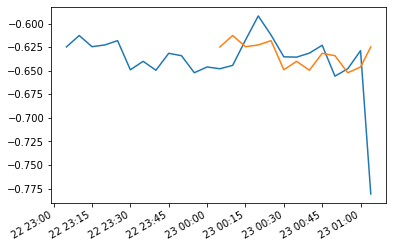

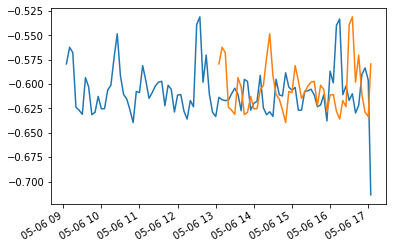

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_cpu', app='collector':
[TEST BENCH] Average mse over the test set is        2.051744223498774
[TEST BENCH] Average precision over the test set is  0.48607425105076874
[TEST BENCH] Average recall over the test set is     0.5107546633809845
[TEST BENCH] Average F1 over the test set is         0.4935019453339341
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_cpu', app='collector'
[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='moc/smaug':
[TEST BENCH] Average mse over the test set is        0.004622262485128901
[TEST BENCH] Average precision over the test set is  0.7141261058663709
[TEST BENCH] Average recall over the test set is     0.6715408745

In [3]:
tb = bench.TestBench(
    class_to_test=DumbPredictor,
    path_to_data="./data/"
)
tb.run_training_and_tests()